In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

### Считывание файлов

In [28]:
train = pd.read_csv("train.csv")
formula_train = pd.read_csv("formula_train.csv")

test = pd.read_csv("test.csv")
formula_test = pd.read_csv("formula_test.csv")

### Знакомство с данными

In [29]:
print(f"train - {train.shape}, null - {train.isna().sum().sum()}")
print(f"test - {test.shape}, null - {test.isna().sum().sum()}")
print(f"formula_train - {formula_train.shape}, null - {formula_train.isna().sum().sum()}")
print(f"formula_test - {formula_test.shape}, null - {formula_test.isna().sum().sum()}")

train - (17010, 82), null - 0
test - (4253, 81), null - 0
formula_train - (17010, 88), null - 0
formula_test - (4253, 87), null - 0


In [30]:
# Нахождение полностью одинаковых строк
duplicates = train[train.duplicated(keep="first") & ~train.duplicated()]
duplicates

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp


In [31]:
duplicates = test[test.duplicated(keep='first') & ~test.duplicated()]
duplicates

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence


In [32]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [33]:
train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,4.113874,87.534919,73.000381,71.308789,58.599393,1.165500,1.063972,115.443468,33.228642,44.320187,...,3.151430,3.055206,3.054358,1.295344,1.052631,2.042034,1.482988,0.839731,0.673590,34.502993
std,1.437846,29.786319,33.730910,31.166777,36.902657,0.364607,0.401877,54.614167,27.104426,19.993413,...,1.192035,1.045869,1.175579,0.393231,0.380725,1.244305,0.980906,0.485728,0.454975,34.334793
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.383174,52.078254,58.001648,35.228269,0.966676,0.777721,78.353150,16.790394,32.890369,...,2.117647,2.245649,2.091629,1.060857,0.779166,1.000000,0.920000,0.451754,0.307467,5.330000
50%,4.000000,84.841880,60.547264,66.361592,39.821155,1.199541,1.148646,122.906070,26.585389,45.123500,...,2.605455,2.615321,2.429201,1.368922,1.168512,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.404410,85.982586,78.116681,73.075297,1.444537,1.359836,154.119320,38.193007,58.973428,...,4.019566,3.722419,3.914868,1.589027,1.331531,3.000000,1.912000,1.200000,1.020735,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [34]:
formula_train.info()
formula_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              17010 non-null  float64
 1   He             17010 non-null  int64  
 2   Li             17010 non-null  float64
 3   Be             17010 non-null  float64
 4   B              17010 non-null  float64
 5   C              17010 non-null  float64
 6   N              17010 non-null  float64
 7   O              17010 non-null  float64
 8   F              17010 non-null  float64
 9   Ne             17010 non-null  int64  
 10  Na             17010 non-null  float64
 11  Mg             17010 non-null  float64
 12  Al             17010 non-null  float64
 13  Si             17010 non-null  float64
 14  P              17010 non-null  float64
 15  S              17010 non-null  float64
 16  Cl             17010 non-null  float64
 17  Ar             17010 non-null  int64  
 18  K     

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [35]:
formula_train.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,17010.000000,17010.0,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,17010.0,17010.0,17010.000000
mean,0.018447,0.0,0.011884,0.035189,0.141945,0.376868,0.012462,3.010023,0.015318,0.0,...,0.035000,0.023379,0.036708,0.049646,0.042367,0.200175,0.0,0.0,0.0,34.502993
std,0.287419,0.0,0.125699,0.861767,1.107689,4.357716,0.123290,3.796711,0.136147,0.0,...,0.310635,0.800146,0.205809,0.279357,0.286488,0.656456,0.0,0.0,0.0,34.334793
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.330000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,2.600000,40.000000,105.000000,120.000000,5.000000,66.000000,4.000000,0.0,...,5.000000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [36]:
# Поиск нулевых столбцов
columns_with_all_zeros = formula_train.columns[(formula_train == 0).all()]
if len(columns_with_all_zeros) > 0:
    print("Столбцы со всеми нулевыми значениями:", *columns_with_all_zeros)
else:
    print("Нет столбцов, где все значения равны 0")

Столбцы со всеми нулевыми значениями: He Ne Ar Kr Xe Pm Po At Rn


### Предобработка данных

In [37]:
# Удаление нулевых и бесполезных столбцов
formula_train = formula_train.drop(columns=["critical_temp"])
formula_train = formula_train.drop(columns=columns_with_all_zeros)
formula_test = formula_test.drop(columns=columns_with_all_zeros)
# Объединение датасетов
train_full = pd.concat([train, formula_train], axis=1)
test_full = pd.concat([test, formula_test], axis=1)

# Удалим из данных ненужную колонку 'material'
train_full.drop(columns=["material"], inplace=True)
test_full.drop(columns=["material"], inplace=True)

print(f"Full Test dataset shape: {test_full.shape}")
print(f"Full Train dataset shape: {train_full.shape}")

Full Test dataset shape: (4253, 158)
Full Train dataset shape: (17010, 159)


In [38]:
df = train_full

### Анализ данных

<Axes: xlabel='critical_temp', ylabel='Count'>

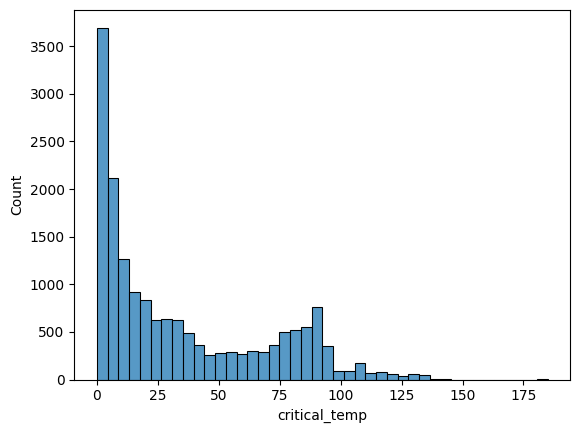

In [39]:
sns.histplot(df["critical_temp"])

In [40]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,4.113874,87.534919,73.000381,71.308789,58.599393,1.165500,1.063972,115.443468,33.228642,44.320187,...,0.010605,0.037991,0.020525,0.061441,0.035000,0.023379,0.036708,0.049646,0.042367,0.200175
std,1.437846,29.786319,33.730910,31.166777,36.902657,0.364607,0.401877,54.614167,27.104426,19.993413,...,0.176198,1.093263,0.269375,0.872817,0.310635,0.800146,0.205809,0.279357,0.286488,0.656456
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,72.383174,52.078254,58.001648,35.228269,0.966676,0.777721,78.353150,16.790394,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,84.841880,60.547264,66.361592,39.821155,1.199541,1.148646,122.906070,26.585389,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,100.404410,85.982586,78.116681,73.075297,1.444537,1.359836,154.119320,38.193007,58.973428,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,14.000000,97.240000,10.000000,45.000000,5.000000,64.000000,8.000000,7.000000,19.000000,14.000000


In [41]:
correlation_with_target = df.corrwith(df["critical_temp"])
# Вывести матрицу корреляции
for index, value in correlation_with_target.items():
    print(f"{index.ljust(30)} {value:.2f}")

number_of_elements             0.60
mean_atomic_mass               -0.11
wtd_mean_atomic_mass           -0.31
gmean_atomic_mass              -0.23
wtd_gmean_atomic_mass          -0.37
entropy_atomic_mass            0.54
wtd_entropy_atomic_mass        0.63
range_atomic_mass              0.50
wtd_range_atomic_mass          -0.34
std_atomic_mass                0.39
wtd_std_atomic_mass            0.37
mean_fie                       0.11
wtd_mean_fie                   0.40
gmean_fie                      -0.02
wtd_gmean_fie                  0.35
entropy_fie                    0.57
wtd_entropy_fie                0.39
range_fie                      0.60
wtd_range_fie                  0.30
std_fie                        0.55
wtd_std_fie                    0.58
mean_atomic_radius             0.11
wtd_mean_atomic_radius         -0.30
gmean_atomic_radius            -0.14
wtd_gmean_atomic_radius        -0.41
entropy_atomic_radius          0.56
wtd_entropy_atomic_radius      0.60
range_atomic_radius

### Разделение на выборки

In [42]:
# Выделим из набора данных вектор признаков и вектор ответов
X = df.drop(columns=["critical_temp"])
y = df["critical_temp"]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 158)
Target shape: (17010,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Train dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (13608, 158), (13608,)
Train dataset size: (3402, 158), (3402,)


### Обучение модели и результаты

In [44]:
# Создадим модель линейной регрессии
model = LinearRegression()

# Обучим линейную регрессию на тренировочном стандартизированном наборе данных
# На этапе обучения алгоритм рассчитывает веса признаков и строит линейное уравнение регрессии
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Создадим массив названия признаков
features = test_full.columns

coeff_df = pd.DataFrame(model.coef_, columns=["Coefficient"])
coeff_df["features"] = features

coeff_df.sort_values(by="Coefficient")

,Coefficient,features
76,-75.112802,wtd_entropy_Valence
25,-31.552003,entropy_atomic_radius
15,-26.511744,entropy_fie
46,-21.453893,wtd_entropy_ElectronAffinity
5,-20.575090,entropy_atomic_mass
...,...,...
65,14.070302,entropy_ThermalConductivity
26,17.481896,wtd_entropy_atomic_radius
56,21.963189,wtd_entropy_FusionHeat
16,61.832234,wtd_entropy_fie


In [46]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Mean Absolute Error: 12.297598978495321
Mean Squared Error: 269.91688437119694
R2 score: 0.7715309460301367


In [47]:
def graf(y_test, y_pred):
    '''
    Построение графика предсказанных от реальных в отсортированном виде
    '''
    # Строим график
    point_numbers = [int(index) for index in range(len(y_test))]

    # Используем zip для объединения массивов и сортируем их по значениям arr1
    sorted_arrays = sorted(zip(y_test, y_pred))
    # Разделяем отсортированные значения обратно на два массива
    y_test, y_pred = zip(*sorted_arrays)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=point_numbers,
            y=y_pred,
            name="Предсказанные значения",
            marker=dict(size=8),
        )
    )
    fig.add_trace(
        go.Scatter(
            x=point_numbers, y=y_test, name="Реальные значения", marker=dict(size=8)
        )
    )

    # Настройка размера
    fig.update_traces(marker=dict(size=8))

    # Добавление легенды
    fig.update_layout(legend=dict(x=0, y=1, traceorder="normal", orientation="h"))

    fig.show()

In [48]:
graf(y_test, y_pred)

### Предсказание ответа

In [49]:
# обучение на всем датасете
X_final = df.drop(columns=["critical_temp"])
y_final = df["critical_temp"]
model_f = LinearRegression()
model_f.fit(X_final, y_final)

LinearRegression()

In [50]:
y_pred_test_full = model_f.predict(test_full)

In [51]:
y_pred_test_full = pd.DataFrame(y_pred_test_full, columns=["critical_temp"])
y_pred_test_full = y_pred_test_full.reset_index()

In [52]:
# y_pred_test_full.to_csv("predict.csv", index=False)